###  *Pirotta Erica*
## *Scientific programming* PYTHON 

# *Kmeans*

Starting from a number of clusters, generates a random clustering of the objects: then applies iteratively two steps, namely *assignment* and *update* until convergence, to identify a proper clustering.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math
import time
import random 
import seaborn as sns
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

### Creating a *CSV* with random points
In this example I consider a bidimensional space (just x and y for each point) but by adding new element to col_list we can consider more dimensions. 

In [2]:
col_list = ['x','y']

df = pd.DataFrame(np.random.uniform(0,40,(50,2)).round(3),columns=col_list)
df.to_csv('kmeans_2D.csv', index=False)

(0,40,(50,2)) -> we generate 50 random points with 2 dimensions (coordinates x and y) with a value between 0 and 40. 

We can change these number to consider more points, change the number of dimensions to consider and we can also change the value that the points can assume.

# 1.  Implementation with LISTS:  Definition of the function *kmeans_lists*

Here we consider each line of the CSV file as a list and we obtain a list of lists.

In [3]:
def kmeans_lists(K,file_csv):
    
    # To compute which is the time of iteration
    start = time.time()
    
    # Read the file as a list of lists:
    with open(file_csv, newline='') as file:
        reader = csv.reader(file)
        lists= list(reader)
    
    # Deletion of the first row that report the names of the columns (x,y,..)
    del lists[0]
    
    # Number of columns that corresponds to the number of dimensions in the space
    dim = len(lists[0])
    
    # Consider each element of the list of lists as float
    lists = [[float(elem)for elem in sublist]for sublist in lists]
    
    # Selection of K random points that represent the initial centroids 
    new_centroids = random.sample(lists, K) 
    current_centroids = [] # define current_centroids as empty 
    
    # Iterate until the new centroids are different from the current (initial) ones
    while new_centroids != current_centroids:
        
        # Set the new centroids as the current ones and perform the iteration with them
        current_centroids =[]
        current_centroids = new_centroids
        
        # Compute all the distances between the points in lists and the points of current centroids
        all_distances = []
        
        for i in lists:
            distance_list=[]
            for j in current_centroids:
                d = math.dist(i,j)
                distance_list.append(d)
            all_distances.append(distance_list)
        # each line report all the distances referring to a single point
            
        # Compute the minimum distance in each line (minimum distance for each point)
        min_dist_list = [min(elem) for elem in all_distances]
        
        # Find the index (position) of the minimum distance in the list, that correspond to the cluster
        index_list = []
        for i in range(0,len(all_distances)):
            index = all_distances[i].index(min_dist_list[i])
            index_list.append(index)
            
        # Add the index (cluster) to the coordinate of the point
        for i in range(0,len(index_list)):
            lists[i].append(index_list[i])
            
        # Group the points based on the cluster
        values = set(map(lambda x:x[dim], lists)) # value that the cluster can have 
        grouped_list = [[y for y in lists if y[dim]==x] for x in values] # grouping
        
        # For each cluster compute the new centroids: 
        new_centroids = []
        for cluster in range(0,len(grouped_list)):
            df = pd.DataFrame(grouped_list[cluster])
            new_coordinate =[]
            for col in df:
                coord = sum(df[col])/len(df[col])
                coord = format(coord, ".3f")
                new_coordinate.append(coord)
            new_centroids.append(new_coordinate) #list of all the new centroids
            
        # Convert the centroids from string to float elements 
        new_centroids = [[float(elem)for elem in sublist]for sublist in new_centroids]
        
        # Remove from the list of the new centroids the cluster information in order to go on with the iteration
        for elem in new_centroids:
            del elem[dim]
            
        newl = '\n'
        # For each iteration:
        print(f'{newl}iterating..{newl}')
        
        # Remove from 'lists' the cluster information in order to go on with the iteration
        for elem in lists:
            del elem[dim]
            
    # print total time: 
    newl = '\n'
    print(f'Time: {time.time()- start} {newl}')
    kmeans_lists.variable = time.time()- start
    #In this way I save the value of the time outside the definition of the function (used after for the visual representation)
   
    # print Final centroids:
    print(f'final centroids:{newl}{new_centroids}{newl}')
    
    # print Final clusters:
    for i in range(K):
        print(f'final cluster {i}: {newl} {grouped_list[i]} {newl}')
     

# 2.  Implementation with NUMPY: Definition of the function *kmeans_np*

Here we consider each line of the CSV file as a numpy vector and we obtain an array of point coordinates. 

In [4]:
def kmeans_np(K,file_csv):
    
    # To compute which is the time of iteration
    start = time.time()

    # Read the file as a numpy array
    file_np = np.genfromtxt(file_csv,delimiter=',', dtype= float)
    file_np = np.delete(file_np, 0, 0)
    
    # I get the number of columns that corresponds to the number of dimensions in the space
    dim = len(file_np[0])
    
    # Selection of K random points that represent the initial centroids 
    rng = np.random.default_rng()
    new_centroids = rng.choice(file_np, K, replace=False)
    new_centroids.astype(np.float)
    
    # Initialize the current_centroids array 
    current_centroids = np.zeros((K, dim))
    
    # Iterate until the new centroids are different from the current (initial) ones
    while (new_centroids != current_centroids).all():
        
        # Set the new centroids as the current ones and perform the iteration with them
        current_centroids = np.zeros((K, dim))
        current_centroids = new_centroids.astype(np.float)
        
        # Compute all the distances between the points in the array and the points of current centroids
        dist = distance_matrix(file_np, current_centroids)
        
        # Compute the minimum distance in each line (minimum distance for each point)
        min_dist = dist.min(axis=1)
        min_dist = min_dist.reshape(min_dist.shape[0],1) #reshape this in order to have a 'column'
        
        # Find the index (position) of the minimum distance in the array, that correspond to the cluster
        index = np.where(dist == min_dist)[1]
        index = index.reshape(index.shape[0],1) #reshape this in order to have a 'column'
        
        # Add the index (cluster) to the coordinate of the point 
        cluster_np = np.append(file_np,index, axis=1)
        
        # Group the points (vectors) based on the cluster
        unique_values = np.unique(cluster_np[:,dim])
        grouped_cluster = [(cluster_np[cluster_np[:,dim]==index,0:(dim+1)]) for index in unique_values] 
        
        # For each cluster compute the new centroids: 
        centroids = []
        for i in range(0,len(grouped_cluster)):
            mean = np.mean(grouped_cluster[i], axis=0) #compute the mean of all the columns in the cluster
            centroid = mean[0:dim] # keep just the columns that goes from 0 to dim
            centroids.append(centroid)
        centroids= np.array(centroids).reshape(K,dim) # here we add the centroids computed for each cluster 
        new_centroids = centroids
        
        # Convert the centroids from string to float elements 
        new_centroids = new_centroids.astype(np.float)
        
        newl = '\n' # newline 
        
        # For each iteration 
        print(f'{newl} iterating..{newl}')
        
        
    # Total time:
    newl = '\n'
    print(f'time: {time.time()- start} {newl}')
    kmeans_np.variable = time.time()- start  
    #In this way I save the value of the time outside the definition of the function (used after for the visual representation)
    
    # Final centroids:
    print(f'final centroids:{newl}{new_centroids}{newl}')
    
    # print Final clusters
    for i in range(K):
        print(f'final cluster {i}: {newl} {grouped_cluster[i]} {newl}')
       

## Usage *examples* of these functions:

### Try the function *kmeans_lists* :

In [5]:
K = int(input(f'Number of cluster(K) to consider: ' )) #select the value of K to consider 
kmeans_lists(K,'kmeans_2D.csv')

Number of cluster(K) to consider: 4

iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..

Time: 0.04864001274108887 

final centroids:
[[27.877, 32.669], [6.388, 31.523], [30.884, 10.525], [13.505, 10.445]]

final cluster 0: 
 [[19.312, 34.896], [22.963, 39.835], [20.491, 38.698], [34.26, 28.65], [30.04, 29.484], [29.705, 30.177], [31.855, 35.616], [27.861, 36.481], [26.639, 23.865], [39.113, 32.918], [27.648, 34.244], [25.475, 27.874], [27.038, 31.96]] 

final cluster 1: 
 [[9.272, 38.776], [5.41, 22.565], [5.457, 31.933], [0.138, 21.431], [15.446, 31.676], [5.971, 39.816], [1.074, 19.973], [9.546, 39.815], [5.178, 37.72]] 

final cluster 2: 
 [[25.472, 5.298], [24.301, 14.92], [37.369, 11.634], [29.95, 14.762], [27.704, 19.459], [37.395, 11.557], [27.127, 9.738], [23.314, 5.714], [35.624, 14.279], [28.124, 18.169], [31.5, 1.809], [27.881, 6.927], [22.911, 19.595], [38.325, 2.094], [30.309, 8.734], [39.464, 10.664], [38.25, 3.5

### Try the function *kmeans_np* :

In [6]:
K = int(input(f'Number of cluster(K) to consider: ' )) # I select the value of K to consider 
kmeans_np(K,'kmeans_2D.csv')

Number of cluster(K) to consider: 4

 iterating..


 iterating..


 iterating..

time: 0.004218339920043945 

final centroids:
[[28.89328571 11.02071429]
 [ 7.3439     12.6356    ]
 [29.327      31.91854545]
 [11.334125   36.66625   ]]

final cluster 0: 
 [[25.472  5.298  0.   ]
 [20.633  7.835  0.   ]
 [24.301 14.92   0.   ]
 [37.369 11.634  0.   ]
 [29.95  14.762  0.   ]
 [27.704 19.459  0.   ]
 [37.395 11.557  0.   ]
 [19.934 18.1    0.   ]
 [27.127  9.738  0.   ]
 [23.314  5.714  0.   ]
 [35.624 14.279  0.   ]
 [28.124 18.169  0.   ]
 [31.5    1.809  0.   ]
 [27.881  6.927  0.   ]
 [22.911 19.595  0.   ]
 [38.325  2.094  0.   ]
 [20.359 13.968  0.   ]
 [30.309  8.734  0.   ]
 [39.464 10.664  0.   ]
 [20.813 12.609  0.   ]
 [38.25   3.57   0.   ]] 

final cluster 1: 
 [[11.993 20.201  1.   ]
 [ 7.897  5.582  1.   ]
 [10.963  6.724  1.   ]
 [ 5.41  22.565  1.   ]
 [ 2.626  3.967  1.   ]
 [ 0.138 21.431  1.   ]
 [10.418 16.383  1.   ]
 [ 1.074 19.973  1.   ]
 [ 7.97   0.723  1.   ]
 [

### As result the functions print:
- the _**number of clusters**_ selected
- the word _**'iterating ...'**_ for each computation of the new centroids
- the _**time**_ needed to reach the convergence of the centroids
- the _**final centroids**_
- the _**final clusters**_ obtained by the assignment and update steps. 

# 3.  VISUAL REPRESENTATION

### 3.1. How performance change depending on the NUMBER of CLUSTERS (K)

- **LISTS:** in this example I collect the times considering different value of K (from 2 to 20) using *kmeans_lists*

In [7]:
times_lists = []
for K in range(2,20):
    kmeans_lists(K,'kmeans_2D.csv')
    times_lists.append(kmeans_lists.variable) #Creation of a list of times with the saved variable of time



iterating..


iterating..


iterating..


iterating..


iterating..

Time: 0.024450063705444336 

final centroids:
[[24.503, 10.134], [18.778, 31.678]]

final cluster 0: 
 [[25.472, 5.298], [20.633, 7.835], [7.897, 5.582], [10.963, 6.724], [24.301, 14.92], [37.369, 11.634], [29.95, 14.762], [27.704, 19.459], [37.395, 11.557], [19.934, 18.1], [27.127, 9.738], [23.314, 5.714], [35.624, 14.279], [2.626, 3.967], [28.124, 18.169], [31.5, 1.809], [10.418, 16.383], [27.881, 6.927], [22.911, 19.595], [38.325, 2.094], [20.359, 13.968], [30.309, 8.734], [7.97, 0.723], [39.464, 10.664], [14.95, 8.807], [20.813, 12.609], [38.25, 3.57]] 

final cluster 1: 
 [[19.312, 34.896], [11.993, 20.201], [22.963, 39.835], [9.272, 38.776], [5.41, 22.565], [20.491, 38.698], [5.457, 31.933], [34.26, 28.65], [30.04, 29.484], [0.138, 21.431], [15.446, 31.676], [5.971, 39.816], [29.705, 30.177], [31.855, 35.616], [27.861, 36.481], [26.639, 23.865], [39.113, 32.918], [1.074, 19.973], [9.546, 39.815], [27.648, 34.24


iterating..


iterating..


iterating..


iterating..


iterating..

Time: 0.0334930419921875 

final centroids:
[[22.382, 17.538], [37.738, 8.966], [7.364, 4.249], [35.076, 32.395], [27.601, 6.37], [8.478, 36.623], [5.807, 20.111], [19.189, 10.805], [28.593, 17.463], [23.655, 36.831], [27.779, 28.672]]

final cluster 0: 
 [[24.301, 14.92], [19.934, 18.1], [22.911, 19.595]] 

final cluster 1: 
 [[37.369, 11.634], [37.395, 11.557], [35.624, 14.279], [38.325, 2.094], [39.464, 10.664], [38.25, 3.57]] 

final cluster 2: 
 [[7.897, 5.582], [10.963, 6.724], [2.626, 3.967], [7.97, 0.723]] 

final cluster 3: 
 [[34.26, 28.65], [31.855, 35.616], [39.113, 32.918]] 

final cluster 4: 
 [[25.472, 5.298], [27.127, 9.738], [23.314, 5.714], [31.5, 1.809], [27.881, 6.927], [30.309, 8.734]] 

final cluster 5: 
 [[9.272, 38.776], [5.457, 31.933], [15.446, 31.676], [5.971, 39.816], [9.546, 39.815], [5.178, 37.72]] 

final cluster 6: 
 [[11.993, 20.201], [5.41, 22.565], [0.138, 21.431], [10.418, 16.383],


Time: 0.03433990478515625 

final centroids:
[[2.207, 21.323], [37.463, 12.034], [36.025, 2.491], [23.314, 5.714], [28.104, 19.064], [20.586, 13.288], [17.791, 8.321], [19.553, 36.276], [26.677, 6.112], [30.333, 31.934], [28.718, 9.236], [5.457, 31.933], [7.364, 4.249], [9.409, 39.296], [22.382, 17.538], [5.575, 38.768], [11.206, 18.292]]

final cluster 0: 
 [[5.41, 22.565], [0.138, 21.431], [1.074, 19.973]] 

final cluster 1: 
 [[37.369, 11.634], [37.395, 11.557], [35.624, 14.279], [39.464, 10.664]] 

final cluster 2: 
 [[31.5, 1.809], [38.325, 2.094], [38.25, 3.57]] 

final cluster 3: 
 [[23.314, 5.714]] 

final cluster 4: 
 [[29.95, 14.762], [27.704, 19.459], [28.124, 18.169], [26.639, 23.865]] 

final cluster 5: 
 [[20.359, 13.968], [20.813, 12.609]] 

final cluster 6: 
 [[20.633, 7.835], [14.95, 8.807]] 

final cluster 7: 
 [[19.312, 34.896], [22.963, 39.835], [20.491, 38.698], [15.446, 31.676]] 

final cluster 8: 
 [[25.472, 5.298], [27.881, 6.927]] 

final cluster 9: 
 [[34.26,

- **NUMPY:** in this example I collect the times considering different value of K (from 2 to 20) using *kmeans_np*

In [8]:
times_np = []
for K in range(2,20):
    kmeans_np(K,'kmeans_2D.csv')
    times_np.append(kmeans_np.variable) 
    


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..

time: 0.01121211051940918 

final centroids:
[[18.7776087  31.67843478]
 [24.50307407 10.13411111]]

final cluster 0: 
 [[19.312 34.896  0.   ]
 [11.993 20.201  0.   ]
 [22.963 39.835  0.   ]
 [ 9.272 38.776  0.   ]
 [ 5.41  22.565  0.   ]
 [20.491 38.698  0.   ]
 [ 5.457 31.933  0.   ]
 [34.26  28.65   0.   ]
 [30.04  29.484  0.   ]
 [ 0.138 21.431  0.   ]
 [15.446 31.676  0.   ]
 [ 5.971 39.816  0.   ]
 [29.705 30.177  0.   ]
 [31.855 35.616  0.   ]
 [27.861 36.481  0.   ]
 [26.639 23.865  0.   ]
 [39.113 32.918  0.   ]
 [ 1.074 19.973  0.   ]
 [ 9.546 39.815  0.   ]
 [27.648 34.244  0.   ]
 [25.475 27.874  0.   ]
 [ 5.178 37.72   0.   ]
 [27.038 31.96   0.   ]] 

final cluster 1: 
 [[25.472  5.298  1.   ]
 [20.633  7.835  1.   ]
 [ 7.897  5.582  1.   ]
 [10.963  6.724  1.   ]
 [24.301 14.92   1.   ]
 [37.369 11.634  1.   ]
 [29.95  14.

It's possible to change the range of K values to consider.

## Visualization
Plot the variation of *time* considering different value of *K*.

We can build a dataframe in which we report the value of K and the corresponding times considering the two implementation and then plot the variation of time according to the variation of the K value. 
In this way is possible to compare the performance of the two implementations. 

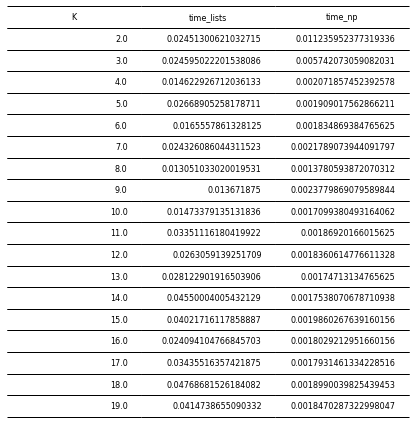

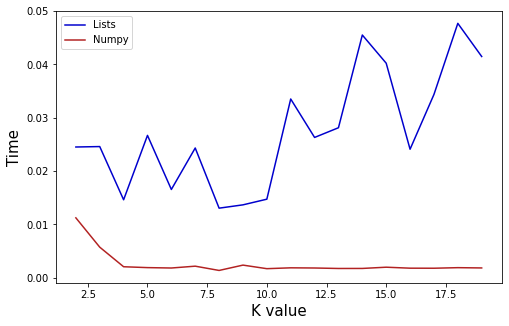

In [9]:
# Value of K considered 
K = range(2,20)

# Build the dataframe considering K, times of lists and times of numpy:
df_k = pd.DataFrame(zip(K,times_lists, times_np))
df_k.columns = ['K','time_lists','time_np']

# Visualize the dataframe (df_k)
fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=df_k.values,colLabels=df_k.columns,loc="center", edges='horizontal')
table.scale(1.2, 1.8)
table.set_fontsize(30)

# Comparison of the 2 lineplots
plt.figure(figsize=(8,5))
p = sns.lineplot(data = df_k, x ='K', y = 'time_lists', color = "mediumblue")
p = sns.lineplot(data = df_k, x ='K', y = 'time_np', color = "firebrick")
p.set_ylabel("Time", fontsize = 15)
p.set_xlabel("K value", fontsize = 15)
plt.legend(labels=['Lists', 'Numpy'])

plt.show()

### 3.2. How performance change depending on the SIZE of the VECTORS

- **LISTS:** in this example I collect the times considering different size of vectors (creating at each iteration a new CSV file with different number of columns) using *kmeans_lists*

In [10]:
nr_col = range(2,12) 

times_lists = []
for i in nr_col:
    df = pd.DataFrame(np.random.uniform(0,40,(50,i)).round(3)) 
    df.to_csv(f'kmeans_nCols.csv', index=False) #save the dataframe as a CSV with the name 'kmeans_nCols.csv'
    print(df)
    kmeans_lists(3,f'kmeans_nCols.csv')
    times_lists.append(kmeans_lists.variable)
    

         0       1
0   14.287  28.473
1   26.213  13.271
2   20.525  21.745
3   39.649  36.056
4   12.552  37.261
5   10.729   0.416
6   39.239  31.500
7   10.509  23.583
8   12.204  25.625
9   23.594  31.954
10  38.267  31.796
11  22.380  30.908
12  24.553  17.067
13  20.296  29.318
14  36.335  37.871
15  24.825  28.639
16  34.270  39.471
17   4.775  23.255
18  11.395  37.007
19  31.317  12.683
20  13.697   0.045
21  19.509  32.219
22   3.612  19.400
23   8.285  12.007
24  34.401  22.852
25  31.058   7.075
26  37.307  17.349
27  16.786  36.609
28  22.020  14.336
29   6.164  38.730
30   0.066  11.259
31  14.774  25.394
32  19.121  30.364
33  14.141   7.894
34  19.465  12.913
35  18.444  13.564
36  14.161  23.694
37  31.799  30.841
38  20.086  28.945
39  14.915  10.853
40  16.706  39.256
41  38.840   0.670
42  20.827   9.627
43  10.974  35.159
44  29.114  25.427
45  33.186   2.035
46  15.970  13.336
47   6.710  26.602
48  32.531   9.356
49  32.587  14.645

iterating..


iterating..


it



iterating..


iterating..

Time: 0.017869949340820312 

final centroids:
[[18.253, 17.762, 24.63, 33.708, 22.894, 15.13, 8.76, 25.628, 18.458, 10.449], [23.256, 16.332, 19.052, 15.15, 17.983, 22.709, 16.959, 19.144, 28.649, 21.194], [21.399, 30.162, 25.101, 23.933, 26.546, 20.398, 30.165, 20.128, 14.575, 17.557]]

final cluster 0: 
 [[12.846, 13.52, 19.946, 31.826, 24.919, 22.169, 25.795, 23.041, 20.251, 5.523], [14.049, 13.627, 29.816, 26.035, 9.376, 25.534, 9.66, 12.904, 4.022, 1.153], [32.562, 18.346, 17.539, 39.673, 24.012, 30.676, 4.902, 36.97, 31.275, 18.154], [2.189, 11.648, 34.806, 31.811, 16.363, 24.874, 2.366, 3.404, 6.238, 1.576], [22.137, 25.675, 14.121, 35.922, 31.078, 25.448, 0.894, 4.688, 23.549, 11.506], [15.701, 8.994, 33.139, 34.113, 36.024, 0.183, 8.301, 34.855, 16.467, 31.044], [27.978, 5.847, 3.813, 28.464, 15.97, 7.431, 12.069, 25.47, 16.211, 12.511], [11.275, 38.483, 37.942, 39.209, 8.281, 7.757, 4.555, 38.225, 24.734, 0.1], [17.291, 34.456, 34.389, 39.247, 34.

- **NUMPY:** in this example I collect the times considering different size of vectors (creating at each iteration a new CSV file with different number of columns) using *kmeans_np*

In [11]:
nr_col = range(2,11) 

times_np = []
for i in nr_col:
    df = pd.DataFrame(np.random.uniform(0,40,(50,i)).round(3))
    df.to_csv(f'kmeans_nCols.csv', index=False)  
    print(df)
    kmeans_np(3,f'kmeans_nCols.csv')
    times_np.append(kmeans_np.variable)
    

         0       1
0    6.623  19.559
1   18.466  22.813
2    2.004  36.669
3   35.643  28.672
4   12.593  28.078
5    5.282  21.441
6   18.931  36.388
7   39.315  31.093
8    9.930  10.054
9   18.080  11.301
10  11.925  27.083
11  22.101  27.520
12  24.786   2.602
13  33.992   7.383
14  11.940  31.927
15  23.121  31.154
16  16.691  31.877
17   1.366  28.427
18   8.663  10.102
19  18.698  12.072
20   4.579  36.072
21  13.879   8.283
22   0.570  18.735
23  29.134  24.235
24   9.631  13.769
25  28.047  17.888
26  35.583  36.985
27  34.901   4.932
28  21.842  30.539
29  33.199  25.948
30   5.432   5.318
31  33.297  38.706
32   5.383  10.117
33   1.085   3.249
34  33.390  25.234
35  15.508  39.403
36  24.789  13.519
37  39.572  39.773
38  26.811   6.462
39  17.827  32.633
40  39.268   1.070
41  35.211  31.877
42   4.665  17.785
43  34.517  15.927
44  15.299  31.116
45  25.336  25.490
46  18.359  21.280
47  31.707  38.372
48  12.569   4.794
49  11.740  24.929

 iterating..


 iterating..




         0       1       2       3       4       5       6       7       8  \
0   28.417  37.124  30.268  23.869   1.941  24.088  27.540  37.699  38.403   
1    1.353  26.617  38.014   9.868  26.040   4.297  10.962  11.600  11.161   
2   17.239  19.164  12.736  30.735  28.964  39.966  35.103  13.361  25.616   
3   25.968  39.709  35.091  21.120   1.398  24.769  36.900  20.445   6.113   
4    9.680  39.660  38.874  32.286   4.681   8.782   6.042  13.830  14.076   
5   30.170  31.607  20.404  17.281   5.732  15.195  35.439  29.629  10.164   
6   37.370  32.548  13.490  23.759  10.043  11.916  25.975  32.774  22.009   
7    1.705  17.091  33.297  18.709  16.873  35.596   2.868   1.478  16.156   
8    9.083  35.313  10.611  12.874  28.153  34.609  10.998  33.926  39.257   
9   20.874  23.356  31.762  25.308   8.863   7.240  31.039   7.580  33.847   
10   1.315  36.349  31.697  12.600  14.197  34.738  31.079  35.997  11.829   
11  27.198  23.239  19.378  28.096  13.895  37.082  10.329  31.1

### Visualization

Plot the variation of *time* considering different *size of the vectors*.

As in the previous case we can build a dataframe in which we report the sizes considered and the corresponding times considering the two implementation and plot them to compare the performances. 

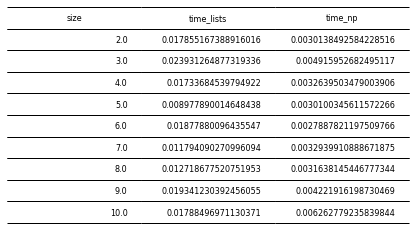

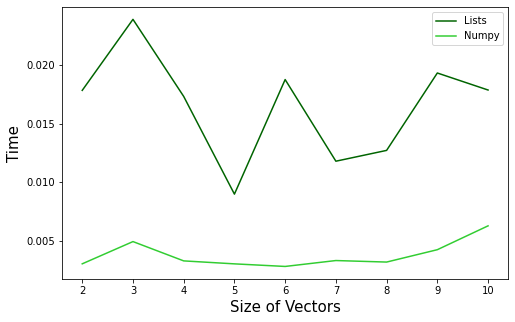

In [12]:
# Sizes considered
size = range(2,11)

# Build the dataframe 
df_c = pd.DataFrame(zip(size,times_lists, times_np))
df_c.columns = ['size','time_lists','time_np']

# Visualize the dataframe (df_s)
fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=df_c.values,colLabels=df_c.columns,loc="center", edges='horizontal')
table.scale(1.2, 1.8)
table.set_fontsize(30)

# Comparison of the 2 lineplots
plt.figure(figsize=(8,5))
p = sns.lineplot(data = df_c, x ='size', y = 'time_lists', color='darkgreen')
p = sns.lineplot(data = df_c, x ='size', y = 'time_np',color='limegreen')
p.set_ylabel("Time", fontsize = 15)
p.set_xlabel("Size of Vectors", fontsize = 15)
plt.legend(labels=['Lists', 'Numpy'])

plt.show()

### 3.3. How performance change depending on the NUMBER of  VECTORS

- **LISTS:** in this example I collect the times considering variation in the number of vectors considered (creating at each iteration a new CSV files with different number of rows) using *kmeans_lists*


In [13]:
col_list = ['x','y']
nr_vectors = range(100,1100,100) #from 100 to 1100 with a step of 100

times_lists = []
for i in nr_vectors:
    df = pd.DataFrame(np.random.uniform(0,40,(i,2)).round(3), columns=col_list)
    df.to_csv(f'kmeans_nRows.csv', index=False) #save the dataframe as a CSV with the name 'kmeans_nRows.csv'
    print(f'length of the new df: {len(df)}')
    kmeans_lists(3,f'kmeans_nRows.csv')
    times_lists.append(kmeans_lists.variable)
    

length of the new df: 100

iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..

Time: 0.04069781303405762 

final centroids:
[[30.032, 22.403], [12.921, 8.308], [7.997, 29.594]]

final cluster 0: 
 [[26.099, 32.316], [39.02, 36.41], [22.613, 22.685], [32.121, 39.761], [32.518, 7.537], [34.335, 1.993], [24.88, 30.604], [32.403, 3.256], [25.594, 39.805], [26.63, 33.217], [28.334, 7.866], [26.267, 16.327], [34.385, 34.155], [30.623, 31.486], [21.131, 28.817], [25.966, 22.874], [28.991, 23.57], [37.106, 25.295], [35.808, 8.571], [25.46, 15.309], [29.378, 17.305], [30.821, 18.716], [32.619, 8.037], [27.771, 39.067], [35.139, 29.262], [37.287, 7.598], [38.108, 2.331], [30.903, 21.234], [24.525, 26.409], [26.354, 27.475], [28.463, 37.732], [37.05, 38.128], [33.08, 32.723], [27.258, 12.876], [36.592, 2.8], [29.935, 32.707], [37.022, 26.193], [26.336, 19.082], [27.141, 26.927], [32.016, 11.665], [26.83, 19.078], [22.056, 33.451], [23.525



iterating..

Time: 0.052739858627319336 

final centroids:
[[27.187, 7.6], [7.233, 19.823], [27.353, 28.812]]

final cluster 0: 
 [[32.208, 16.184], [30.36, 0.825], [35.994, 9.686], [28.689, 2.087], [16.384, 2.362], [34.162, 17.148], [12.52, 1.604], [27.325, 3.832], [20.777, 11.299], [18.583, 14.566], [28.674, 7.998], [39.019, 2.805], [14.921, 7.301], [25.57, 11.723], [34.938, 17.156], [14.504, 1.157], [36.433, 0.389], [23.945, 1.896], [38.142, 0.057], [26.328, 10.769], [12.752, 5.51], [31.871, 8.867], [16.557, 0.392], [37.806, 1.051], [37.763, 2.431], [39.927, 2.053], [39.595, 4.457], [23.438, 5.915], [19.026, 7.198], [18.405, 3.048], [38.605, 8.05], [16.502, 2.852], [27.574, 14.059], [29.129, 11.897], [18.037, 1.758], [30.485, 0.857], [18.553, 5.691], [33.021, 10.555], [25.381, 10.704], [32.125, 4.545], [27.557, 12.691], [29.427, 3.363], [35.304, 17.699], [23.141, 4.287], [19.875, 6.277], [18.477, 12.216], [26.779, 2.037], [27.116, 15.397], [39.888, 0.69], [32.812, 7.961], [15.774,


Time: 0.14744901657104492 

final centroids:
[[23.7, 7.486], [30.133, 29.083], [8.904, 24.145]]

final cluster 0: 
 [[16.726, 9.548], [36.331, 11.174], [12.539, 0.171], [31.735, 8.93], [18.323, 14.721], [32.998, 13.223], [19.245, 0.327], [21.881, 1.285], [17.748, 4.288], [24.85, 9.587], [9.387, 3.67], [21.434, 6.401], [4.983, 1.32], [18.658, 15.802], [12.384, 2.66], [33.649, 1.628], [27.686, 9.924], [25.109, 15.357], [6.247, 1.429], [5.325, 3.479], [30.241, 6.184], [20.36, 9.893], [36.417, 5.724], [18.312, 1.346], [33.804, 15.648], [25.6, 8.838], [18.798, 11.295], [35.968, 5.527], [39.009, 6.648], [26.809, 9.74], [17.762, 14.352], [4.521, 2.68], [23.145, 9.135], [15.018, 12.489], [20.477, 14.761], [5.912, 1.195], [34.397, 3.398], [37.448, 1.68], [20.397, 13.23], [8.783, 6.418], [34.916, 0.267], [26.705, 17.01], [14.63, 0.646], [28.836, 7.848], [38.338, 14.288], [37.628, 5.234], [38.071, 10.988], [23.509, 9.831], [32.656, 3.609], [35.639, 11.586], [12.749, 8.101], [10.53, 3.552], [19.7



iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..

Time: 0.20139503479003906 

final centroids:
[[8.187, 21.984], [25.895, 8.825], [28.176, 29.8]]

final cluster 0: 
 [[1.024, 19.778], [12.812, 24.012], [6.744, 1.631], [3.757, 0.221], [15.137, 19.384], [2.012, 1.784], [14.763, 26.244], [2.267, 33.764], [11.811, 15.376], [10.337, 9.561], [9.847, 12.674], [0.544, 17.269], [7.72, 22.346], [2.321, 32.185], [1.305, 35.075], [6.365, 32.236], [4.006, 18.854], [6.461, 31.154], [0.167, 12.567], [11.482, 15.602], [13.913, 32.578], [0.03, 19.377], [6.26, 9.939], [11.232, 18.557], [3.079, 32.339], [11.264, 21.731], [8.348, 38.293], [0.113, 32.481], [3.424, 25.481], [0.555, 20.96], [0.506, 14.821], [15.251, 32.266], [13.588, 26.042], [7.375, 12.276], [5.32, 36.159], [5.905, 9.363], [2.432, 9.308], [12.113, 18.777], [15.86, 27.338], [1.892, 1.433], [13.558, 18.986], [7.095, 38.787], [15.665, 17.627], [6.373, 37.817], [9.189,


iterating..


iterating..

Time: 0.14168596267700195 

final centroids:
[[26.343, 31.733], [7.954, 17.864], [29.761, 10.38]]

final cluster 0: 
 [[34.557, 38.845], [22.135, 23.593], [25.112, 35.55], [32.96, 38.5], [32.94, 34.321], [19.956, 36.605], [37.928, 34.985], [24.795, 33.866], [17.323, 33.28], [32.421, 28.799], [35.685, 33.908], [15.6, 36.053], [26.574, 31.374], [19.271, 23.576], [30.914, 27.63], [36.127, 25.859], [17.277, 32.035], [30.428, 24.959], [32.887, 29.628], [34.949, 29.79], [17.294, 38.103], [26.802, 32.378], [31.523, 38.425], [26.139, 32.703], [26.656, 24.946], [37.876, 28.182], [7.469, 39.91], [33.131, 39.332], [27.692, 32.676], [23.035, 36.43], [29.893, 27.588], [37.154, 27.409], [32.12, 34.88], [27.921, 29.89], [30.656, 37.995], [39.169, 32.668], [9.9, 36.811], [31.201, 37.473], [13.426, 33.587], [31.238, 33.658], [17.427, 35.945], [23.622, 22.567], [34.528, 39.509], [35.002, 22.61], [34.83, 36.349], [37.901, 24.009], [17.883, 34.134], [33.716, 23.764], [31.782, 3


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..


iterating..

Time: 0.22318696975708008 

final centroids:
[[8.307, 25.134], [22.742, 8.62], [29.599, 29.814]]

final cluster 0: 
 [[8.505, 23.999], [0.688, 27.475], [14.616, 24.83], [5.499, 27.208], [16.038, 35.627], [14.238, 28.027], [2.857, 9.697], [19.438, 21.774], [0.755, 7.918], [14.095, 38.701], [10.804, 28.764], [19.471, 22.551], [4.425, 18.865], [14.37, 33.125], [11.579, 20.828], [12.937, 38.17], [18.464, 28.151], [16.216, 27.132], [17.822, 21.592], [9.76, 32.65], [16.766, 26.938], [5.679, 34.693], [13.192, 26.05], [15.997, 27.189], [12.829, 17.241], [6.428, 25.471], [15.156, 35.498], [3.577, 29.402], [8.511, 19.248], [3.865, 23.519], [14.313, 21.353], [4.052, 23.661], [9.329, 20.083], [1.686, 23.496], [16.123, 26.512], [13.443, 33.138], [14.956, 33.389], [4.583, 13.398], [9.231, 13.593], [6.273, 11.762], [0.725, 11.059], [10.252, 24.7], [14.35, 23.385], [11.609, 23.

- **NUMPY:** in this example I collect the times considering variation in the number of vectors considered (creating at each iteration a new CSV file with different number of rows) using *kmeans_np*

In [14]:
col_list = ['x','y']
nr_vectors = range(100,1100,100) 

times_np = []
for i in nr_vectors:
    df = pd.DataFrame(np.random.uniform(0,40,(i,2)).round(3), columns=col_list)
    df.to_csv(f'kmeans_nRows.csv', index=False)
    print(f'length of the new df: {len(df)}')
    kmeans_np(3,f'kmeans_nRows.csv')
    times_np.append(kmeans_np.variable)
    

length of the new df: 100

 iterating..


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..

time: 0.008690118789672852 

final centroids:
[[19.52215385  8.76058974]
 [31.7643     27.95266667]
 [ 8.66445161 27.56258065]]

final cluster 0: 
 [[2.2509e+01 1.5510e+01 0.0000e+00]
 [2.2550e+01 1.6498e+01 0.0000e+00]
 [1.1138e+01 6.0850e+00 0.0000e+00]
 [1.9924e+01 6.9940e+00 0.0000e+00]
 [1.5659e+01 1.5116e+01 0.0000e+00]
 [8.8710e+00 1.2984e+01 0.0000e+00]
 [1.9753e+01 1.2310e+00 0.0000e+00]
 [2.3970e+01 5.1000e-01 0.0000e+00]
 [2.7256e+01 1.6726e+01 0.0000e+00]
 [1.9025e+01 1.3793e+01 0.0000e+00]
 [1.1412e+01 1.5300e+00 0.0000e+00]
 [1.3105e+01 6.5640e+00 0.0000e+00]
 [3.1638e+01 1.0276e+01 0.0000e+00]
 [1.6695e+01 6.2400e+00 0.0000e+00]
 [5.9310e+00 8.5150e+00 0.0000e+00]
 [1.2973e+01 1.1616e+01 0.0000e+00]
 [1.8398e+01 1.0203e+01 0.0000e+00]
 [1.7975e+01 6.7420e+00 0.0000e+00]
 [3.3279e+01 2.6000e-02 0.0000e+00]
 [2.5600e+00 9.5520e+00 0.0000e+00]
 [1.7117e+01 8.9

final cluster 0: 
 [[29.122  2.163  0.   ]
 [30.47   0.185  0.   ]
 [36.493 12.66   0.   ]
 [36.88   6.973  0.   ]
 [36.716 11.295  0.   ]
 [32.597 18.658  0.   ]
 [29.189  5.363  0.   ]
 [33.036 14.558  0.   ]
 [18.425 14.617  0.   ]
 [22.971 12.993  0.   ]
 [25.491  2.001  0.   ]
 [38.536  3.499  0.   ]
 [22.639 11.084  0.   ]
 [39.953  3.595  0.   ]
 [31.858  4.708  0.   ]
 [35.34  10.423  0.   ]
 [30.235 19.929  0.   ]
 [31.406  2.676  0.   ]
 [29.28  12.931  0.   ]
 [36.069 21.643  0.   ]
 [39.423 12.206  0.   ]
 [38.439  4.678  0.   ]
 [24.378 18.729  0.   ]
 [22.138 16.91   0.   ]
 [30.203  3.213  0.   ]
 [28.364 19.666  0.   ]
 [23.074  8.009  0.   ]
 [27.648 17.371  0.   ]
 [39.247 16.3    0.   ]
 [37.42  15.841  0.   ]
 [29.262  1.014  0.   ]
 [33.363 17.31   0.   ]
 [32.666 11.441  0.   ]
 [18.442  4.102  0.   ]
 [21.795  6.488  0.   ]
 [37.26  12.075  0.   ]
 [24.15  11.746  0.   ]
 [29.472 14.519  0.   ]
 [23.326  7.608  0.   ]
 [36.266  6.1    0.   ]
 [39.521 15.095  0.  


length of the new df: 800

 iterating..


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..


 iterating..

time: 0.013880014419555664 

final centroids:
[[31.12409705 12.62075105]
 [20.84839672 32.4454459 ]
 [ 8.4722907  13.48555426]]

final cluster 0: 
 [[23.737  9.63   0.   ]
 [27.43  17.834  0.   ]
 [29.018  8.42   0.   ]
 [31.635 16.567  0.   ]
 [23.373 18.725  0.   ]
 [36.737 21.11   0.   ]
 [23.22  12.629  0.   ]
 [35.193 23.77   0.   ]
 [23.101  6.002  0.   ]
 [35.446  7.942  0.   ]
 [38.22  26.71   0.   ]
 [26.441  9.469  0.   ]
 [35.745 24.614  0.   ]
 [38.966  2.008  0.   ]
 [19.898  1.512  0.   ]
 [32.15  12.276  0.   ]
 [36.579 11.786  0.   ]
 [32.867 18.605  0.   ]
 [35.023  1.197  0.   ]
 [28.646  2.298  0.   ]
 [21.263 12.788  0.   ]
 [30.4   23.139  0.   ]
 [26.544 21.759  0.   ]
 [38.531  8.856  0.   ]
 [30.736  5.605  0.   ]
 [36.232 11.533  0.   ]
 [34.405 25.69   0.   ]
 [24.483  5.238  0.   ]
 [19.455  3.468  0.   ]
 [22.732 19.633  0.   ]


### Visualization

Plot the variation of *time* considering different *numbers of the vectors*

As before we build a dataframe in which we report the different number of vectors considered and the times of the two implementations and plot them to compare the performances. 

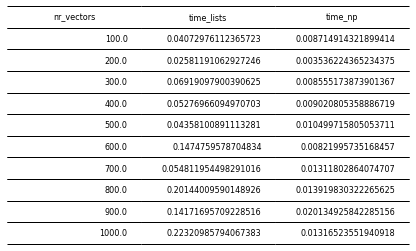

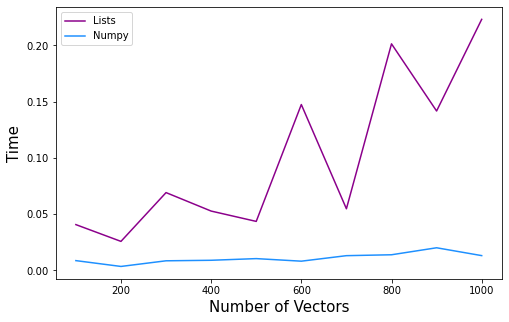

In [15]:
# Build the dataframe 
df_r = pd.DataFrame(zip(nr_vectors,times_lists, times_np))
df_r.columns = ['nr_vectors','time_lists','time_np']

# Visualize the dataframe (df_r)
fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=df_r.values,colLabels=df_r.columns,loc="center", edges='horizontal')
table.scale(1.2, 1.8)
table.set_fontsize(30)

# Comparison of the 2 lineplots
plt.figure(figsize=(8,5))
p = sns.lineplot(data = df_r, x ='nr_vectors', y = 'time_lists', color='darkmagenta')
p = sns.lineplot(data = df_r, x ='nr_vectors', y = 'time_np',color='dodgerblue')
p.set_ylabel("Time", fontsize = 15)
p.set_xlabel("Number of Vectors", fontsize = 15)
plt.legend(labels=['Lists', 'Numpy'])

Considering all the 3 cases we can see that the kmeans computed considering numpy array in general is faster than the case of the kmeans computed considering lists.